In [201]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: C:\Users\fleon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: C:\Users\fleon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: C:\Users\fleon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [202]:
!pip freeze

anyio==4.4.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asgiref==3.5.2
asttokens==2.2.1
async-lru==2.0.4
attrs==22.2.0
azure-functions==1.14.0
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.0
bleach==6.1.0
blinker==1.6.2
bs4==0.0.1
certifi==2022.12.7
cffi==1.16.0
charset-normalizer==3.1.0
click==8.1.3
colorama==0.4.6
comm==0.2.1
contourpy==1.0.6
cryptography==41.0.5
cx-Oracle==8.3.0
cycler==0.11.0
DateTime==5.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
Django==4.1.3
et-xmlfile==1.1.0
exceptiongroup==1.1.1
executing==1.2.0
fastjsonschema==2.20.0
Flask==2.3.2
Flask-Cors==4.0.0
fonttools==4.38.0
fqdn==1.5.1
greenlet==2.0.2
gunicorn==20.1.0
h11==0.14.0
html5lib==1.1
httpcore==1.0.5
httpx==0.27.0
idna==3.4
iniconfig==2.0.0
ipykernel==6.29.0
ipython==8.13.1
ipywidgets==8.1.3
isoduration==20.11.0
itsdangerous==2.1.2
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.22.0
jsonschema-specifications==2023.12.1
jupyter==1.0.0
jup

In [159]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
class HeartFailureDataSet:
    def __init__(self):
        self.data = pd.read_csv("heart_failure_clinical_records.csv")
        self.x = self.data[["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking","time"]]
        self.y = self.data["DEATH_EVENT"]
        self.numeric_columns = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.x, self.y, random_state=104, test_size=0.25, shuffle=True) 
        self.scaler = preprocessing.StandardScaler()
        self.scaler = self.scaler.fit(self.X_train[self.numeric_columns])
        self.X_train[self.numeric_columns] = self.scaler.transform(self.X_train[self.numeric_columns])  
        self.X_test[self.numeric_columns] = self.scaler.transform(self.X_test[self.numeric_columns])  

    def get_training_data(self):
        return self.X_train.copy(), self.y_train.copy()

    def get_test_data(self):
        return self.X_test.copy(), self.y_test.copy()
    
    def get_numeric_columns(self):
        return self.numeric_columns
        
    def get_statistics(self):
        return self.data.describe()

    def get_description(self):
        return """This dataset contains the medical records of 5000 patients who had heart failure, 
        collected during their follow-up period, where each patient profile has 13 clinical features."""

In [203]:
class IBaseModel:
    def __init__(self):
        pass

    def train(self):
        pass

    def get_probabilities(self):
        pass
        
    def get_predictions(self):
        pass

In [205]:
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
class ModelMetrics:
    def __init__(self, model: IBaseModel, x, y):
        print(model)
        self.model = model
        if not self.model.trained: self.model.train()  
        self.data = data
        self.x_test = x
        self.y_test = y
        
    def get_prf(self):
        prediction = self.model.get_predictions(self.x_test)
        precision_0, recall_0, f1_0, support_0 = precision_recall_fscore_support(self.y_test, prediction, average='binary', pos_label=0)
        precision_1, recall_1, f1_1, support_1 = precision_recall_fscore_support(self.y_test, prediction, average='binary', pos_label=1)
        return {
            "Class 0":{
                "Precision": precision_0,
                "Recall": recall_0,
                "F1": f1_0
            },
            "Class 1":{
                "Precision": precision_1,
                "Recall": recall_1,
                "F1": f1_1
            }
        }

    def showROC(self):
        probability = self.model.get_probabilities(self.x_test)
        false_pos_0, true_pos_0, discard = roc_curve(self.y_test, probability[:, 0], pos_label=0)
        auc_0 = auc(false_pos_0, true_pos_0)
        
        false_pos_1, true_pos_1, discard = roc_curve(self.y_test, probability[:, 1], pos_label=1)
        auc_1 = auc(false_pos_1, true_pos_1)
        
        plt.plot(false_pos_0, true_pos_0, marker='.', label='Class 0', color='b')
        plt.plot(false_pos_1, true_pos_1, marker='.', label='Class 1', color='r')
        plt.xlabel('False Positive')
        plt.ylabel('True Positive')
        plt.title(self.model.name)
        plt.legend()
        plt.show()
    

In [206]:
from sklearn.linear_model import LogisticRegressionCV
class LogisticRegressionL2(IBaseModel):
    def __init__(self, x, y, C:int, cv:int=10):
        self.model = LogisticRegressionCV(penalty="l2", cv=cv, Cs=C)
        self.X_train = x
        self.y_train = y
        self.trained = False
        self.name = "LogisticRegressionL2"
    
    def train(self):
        assert len(self.X_train) == len(self.y_train)
        self.model.fit(self.X_train, self.y_train)
        self.Trained = True

    def get_probabilities(self, x):
        return self.model.predict_proba(x)

    def get_predictions(self, x):
        return self.model.predict(x)

In [207]:
data = HeartFailureDataSet()
x_train, y_train = data.get_training_data()
x_test, y_test = data.get_test_data()
lrl2 = LogisticRegressionL2(x_train, y_train, 100)
evaluator = ModelMetrics(lrl2, x_test, y_test)
evaluator.get_prf()

{'Class 0': {'Precision': 0.8597430406852249,
  'Recall': 0.9358974358974359,
  'F1': 0.8962053571428571},
 'Class 1': {'Precision': 0.8259493670886076,
  'Recall': 0.6658163265306123,
  'F1': 0.7372881355932204}}

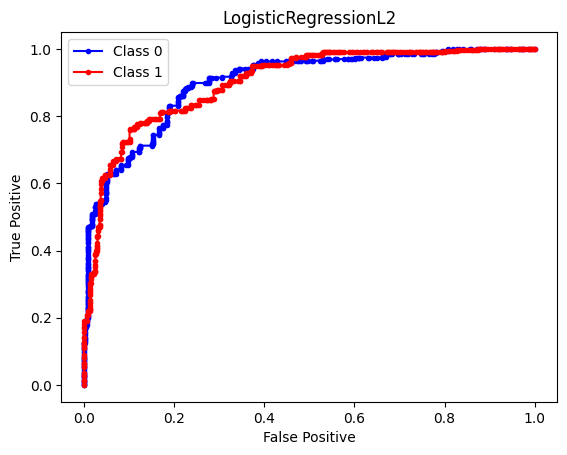

In [208]:
evaluator.showROC()

In [209]:
from sklearn.svm import NuSVC
class NuSupportSVC(IBaseModel):
    def __init__(self, x, y):
        self.model = NuSVC(kernel="linear", gamma='auto', probability=True)
        self.X_train = x
        self.y_train = y
        self.trained = False
        self.name = "NuSupportSVC"
    
    def train(self):
        assert len(self.X_train) == len(self.y_train)
        self.model.fit(self.X_train, self.y_train)
        self.Trained = True

    def get_probabilities(self, x):
        print(self.model)
        return self.model.predict_proba(x)

    def get_predictions(self, x):
        return self.model.predict(x)

In [210]:
nvsc = NuSupportSVC(x_train, y_train)
nsvcEval = ModelMetrics(nvsc, x_test, y_test)
nsvcEval.get_prf()

{'Class 0': {'Precision': 0.8281092012133469,
  'Recall': 0.9545454545454546,
  'F1': 0.8868435300487277},
 'Class 1': {'Precision': 0.8505747126436781,
  'Recall': 0.5663265306122449,
  'F1': 0.6799387442572741}}

NuSVC(gamma='auto', kernel='linear', probability=True)


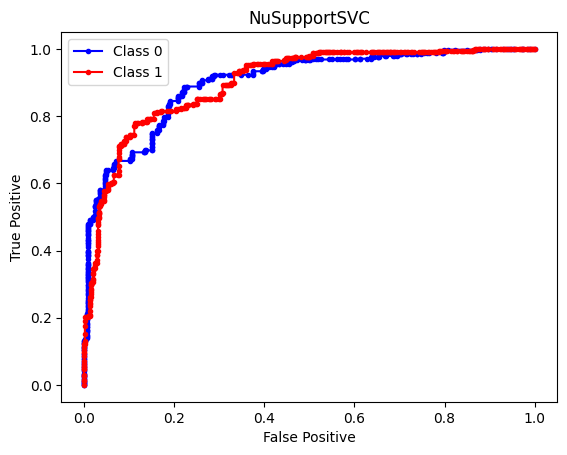

In [211]:
nsvcEval.showROC()